03 PCAの実行
===========

* 画像データセットに対して`PCA`を行う

    * [MNISTデータセット](http://yann.lecun.com/exdb/mnist/)について、0から9までの手書き数値データが含まれている
    
        *　元の画像は$28 \times 28$ピクセル
    
    * [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)についてもある
    
        * より解像度の低い$8 \times 8$ピクセルの画像が配布されている
        
        * よって、scikit-learnのデータは64($8 \times 8$)次元のデータとなる
        
* `PCA`を実行し、第3主成分までを用いてデータを可視化する

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

# データの読み込み
digits_data = datasets.load_digits()
n = len(digits_data.images)

In [2]:
# それぞれの画像は8 × 8の配列としてあらわされている。
# この配列をPCAへの入力とするために1次元へと倒す。
image_data = digits_data.images.reshape((n, -1))
image_data.shape

(1797, 64)

In [3]:
# 各画像の数値の正解ラベルを取得
labels = digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
# データセットに対してPCAを適用する
# 主成分の数は、少なくとも全体の分散の80%が説明できる水準となるよう自動的に選ばれる
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
pca_transformer.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [5]:
# 64×0.4 = 26次元まで削除が可能
pca_transformer.explained_variance_ratio_[:3].sum()

0.40303958587675104

Text(0.5, 0, 'Principal component 3')

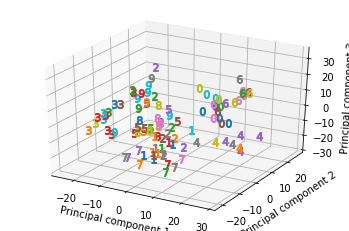

In [7]:
# 結果を可視化する
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(100):
    ax.scatter(pca_images[i,0], pca_images[i,1], pca_images[i,2],
    marker=r'${}$'.format(labels[i]), s=64)

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')

* 上の図では、射影された後の最初の100個のデータで表現されたデータを3次元プロットとして表示している

* データ点を表すマーカー：画像のラベル(正解の数字)

    * 第1〜第3主成分までで、データ全体の分散の約40%を説明する(決して良い方法ではないが、手軽)
    
* 可視化された結果を見ると、`PCA`によって、字面として似ている数字が近い位置に集まっている

    * 例)数字の0と6と7
    
    * この3次元空間は、大まかに0、4、6の属する領域とそれ以外の残りの数字が属する領域に分割できる

* 異なる数値同士が重なっている部分がかなり存在するため、この射影された空間において線形モデルの分類器を構築し数値同士を分類することは難しい

    * 64次元のデータを3次元でどのくらいかを表現できる

| 版   | 年/月/日   |
| ---- | ---------- |
| 初版 | 2019/04/24 |